In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\amaan\\Desktop\\Sem 6 All notebooks\\Datasets\\Mall_Customers.csv",na_values=['.',':','?','!','@','#','$','%','^','&','*',','])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [8]:
df.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [9]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
cat_cols = ['Genre']

In [11]:
num_cols = ['Age', 'Annual Income (k$)']

In [12]:
df['cat_cols'] = df[cat_cols].astype('category')

In [13]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
cat_cols                  object
dtype: object

In [20]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cat_cols
0,Male,19,15,39,Male
1,Male,21,15,81,Male
2,Female,20,16,6,Female
3,Female,23,16,77,Female
4,Female,31,17,40,Female


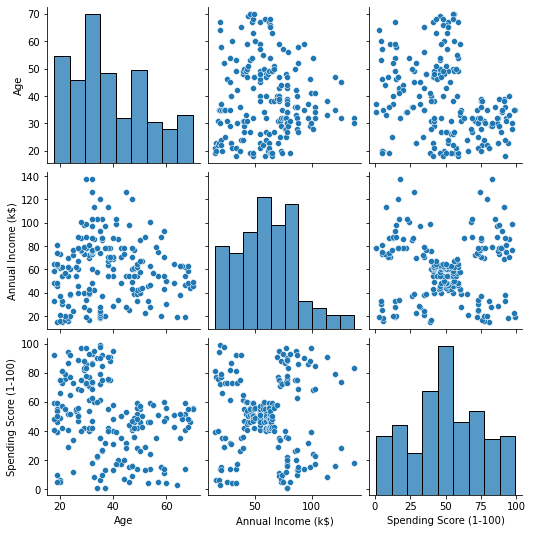

In [21]:
sns.pairplot(data=df)

In [24]:
X = df.drop(['Genre', 'Age', 'cat_cols'], axis = 1)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Hierarchical Clustering

In [25]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [26]:
HiCl = df.copy()

In [27]:
HiCl.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cat_cols
0,Male,19,15,39,Male
1,Male,21,15,81,Male
2,Female,20,16,6,Female
3,Female,23,16,77,Female
4,Female,31,17,40,Female


In [28]:
import scipy.cluster.hierarchy as sch

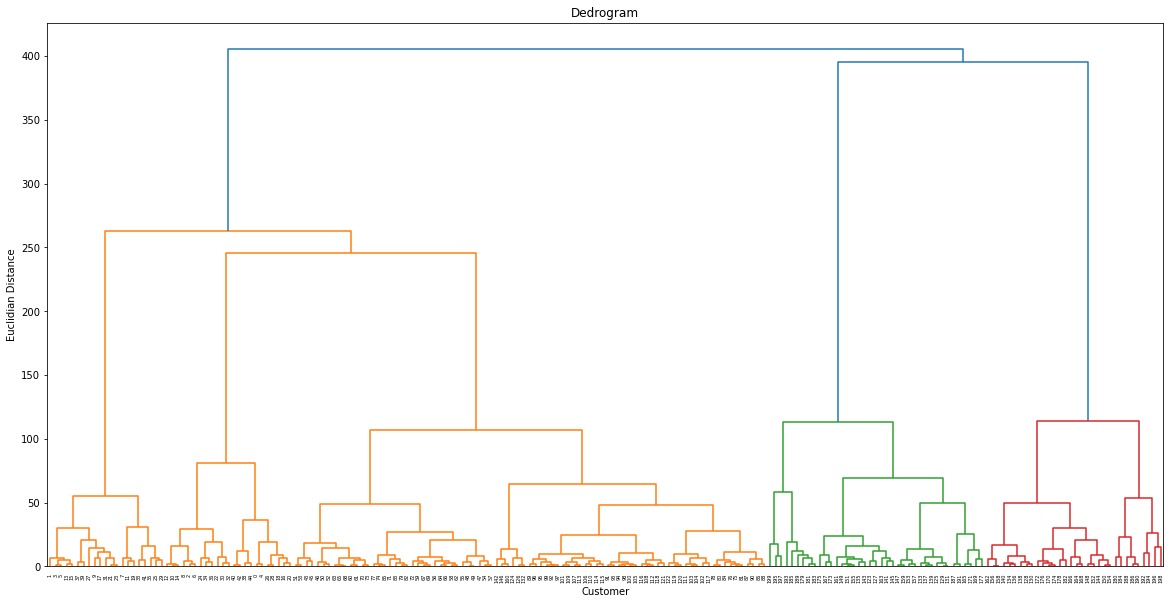

In [32]:
plt.figure(figsize = (20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dedrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidian Distance')
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
clH=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [40]:
clH.fit(X)

AgglomerativeClustering(n_clusters=5)

In [41]:
yH = clH.fit_predict(X)
yH

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [42]:
HiCl['Cluster']=yH

In [43]:
HiCl.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cat_cols,Cluster
0,Male,19,15,39,Male,4
1,Male,21,15,81,Male,3
2,Female,20,16,6,Female,4
3,Female,23,16,77,Female,3
4,Female,31,17,40,Female,4


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

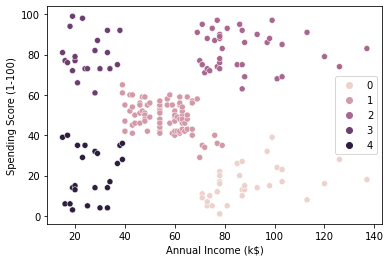

In [44]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=clH.labels_,data=HiCl)

### KMeans Clustering

In [45]:
from sklearn.cluster import KMeans

In [46]:
w=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    w.append(kmeans.inertia_)
w

C:\Users\amaan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25011.839349156595,
 21850.16528258562,
 19672.07284901432,
 17887.084456628654,
 15917.60968942787]

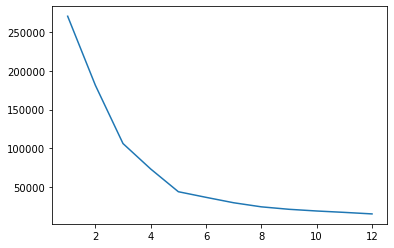

In [47]:
plt.plot(range(1,13),w)

In [48]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)

In [49]:
y=kmeans.fit_predict(X)

In [50]:
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [51]:
mall = df.copy()

In [52]:
mall['Cluster'] = y

In [53]:
mall.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cat_cols,Cluster
0,Male,19,15,39,Male,2
1,Male,21,15,81,Male,3
2,Female,20,16,6,Female,2
3,Female,23,16,77,Female,3
4,Female,31,17,40,Female,2


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

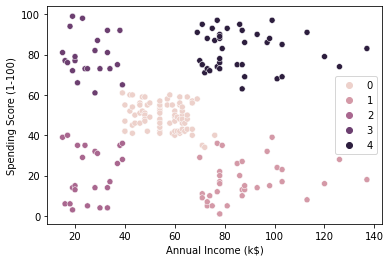

In [54]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=kmeans.labels_,data=mall)